#**KHUSHI : ANTI DEPRESSION VOICE ASSISTANT**
##**MAJOR PROJECT**
###**GROUP 37**

> #### Submitted By:-



*   #### Mahima Munjal (17CSU098)
*   #### Himanshi Kumari(17CSU079)
*   #### Arunima Dahiya (17CSU036)











# **WORD FILTERING PROCESS**

In [ ]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('https://www.kaggle.com/dgenie/sentiment-a?select=sentiment_a.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentimentanalysis.csv to sentimentanalysis.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['sentimentanalysis.csv']))
data = data[['text','sentiment']]

In [ ]:
train, test = train_test_split(data,test_size = 0.1)
train = train[train.sentiment != "Neutral"]

In [ ]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


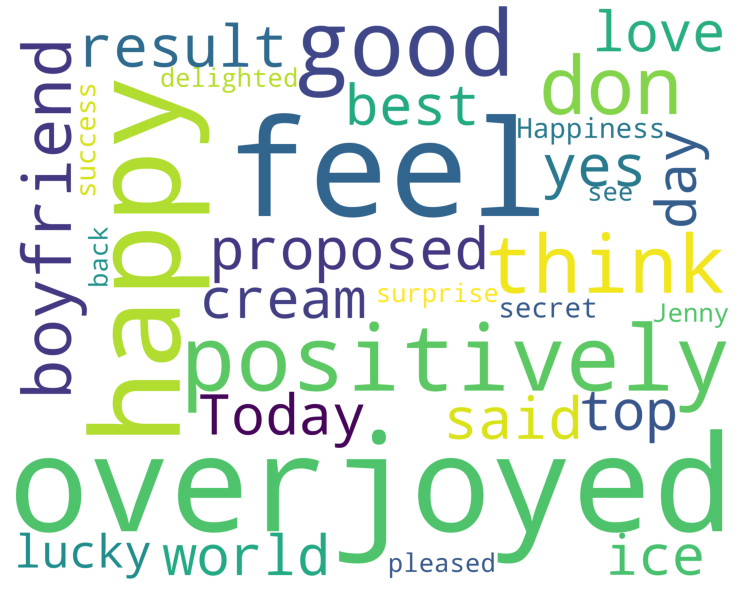

In [ ]:
print("Positive words")
wordcloud_draw(train_pos,'white')

Negative words


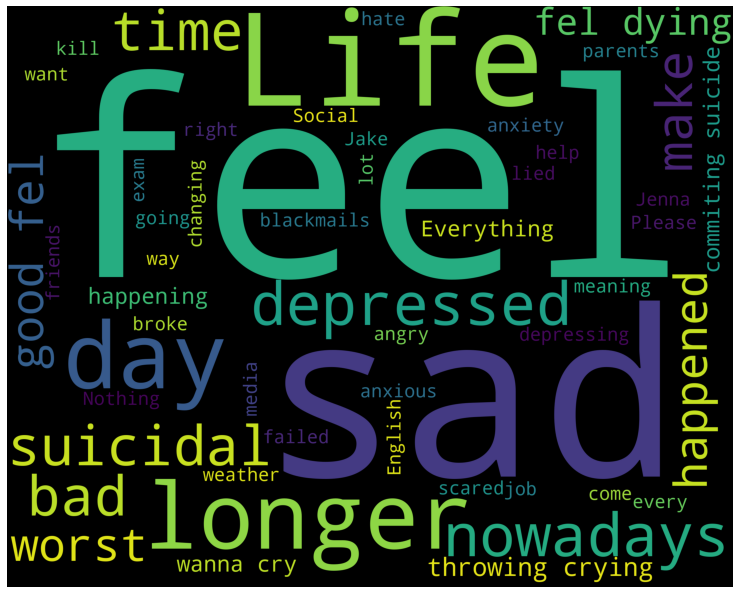

In [ ]:
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
import nltk
nltk.download('stopwords')
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

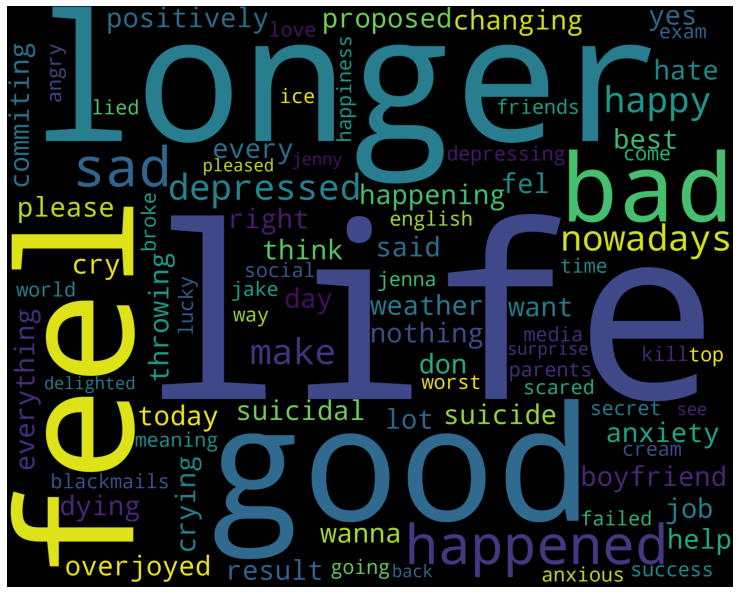

In [ ]:
wordcloud_draw(w_features)

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg)*5,neg_cnt*5))        
print('[Positive]: %s/%s '  % (len(test_pos)*5,pos_cnt*5))    

[Negative]: 55/55 
[Positive]: 0/0 


# **SENTIMENT ANALYSIS ON VOICE**

# Data Exploration

In [ ]:
# importing libraries

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# importing datasets

In [ ]:
TESS = "C:/Users/dell/Downloads/archive (4)/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/"
SAVEE = "C:/Users/dell/Downloads/archive (2)/ALL/"
CREMA = "C:/Users/dell/Downloads/archive (5)/AudioWAV/"

# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [ ]:
# creating dataframe SAVEE_df with labels, source, path as columns

In [ ]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_disgust      60
male_surprise     60
male_sad          60
male_fear         60
male_happy        60
male_angry        60
Name: labels, dtype: int64

In [ ]:
# visualizing and playing audio from SAVEE dataset

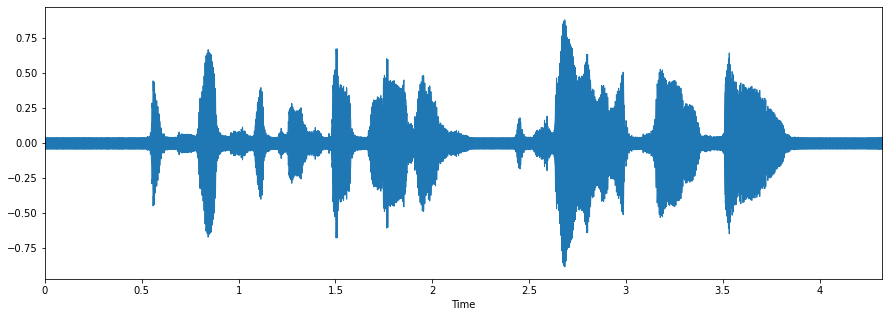

In [ ]:
# use the well known Librosa library for this task 
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

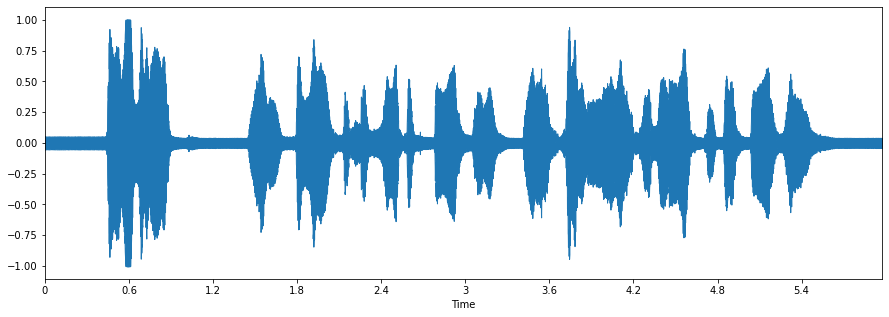

In [ ]:
# Lets play a happy track
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [ ]:
# creating dataframe RAV_df with labels, source, path as columns

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
female_angry        96
male_happy          96
male_disgust        96
male_surprise       96
female_surprise     96
female_fear         96
female_happy        96
male_sad            96
male_fear           96
female_disgust      96
female_sad          96
male_angry          96
Name: labels, dtype: int64

In [ ]:
# visualizing and playing audio from RAVDESS dataset

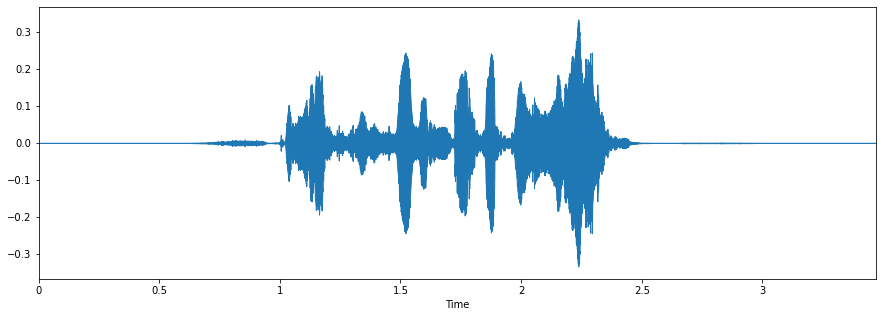

In [ ]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

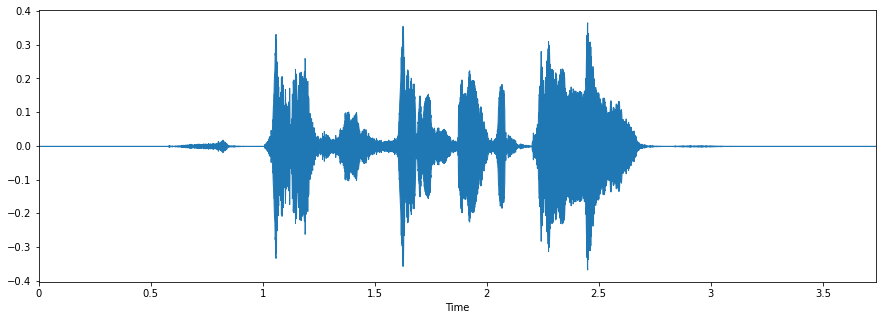

In [ ]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [ ]:
# creating dataframe TESS_df with labels, source, path as columns

In [ ]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_neutral     400
female_happy       400
female_disgust     400
female_sad         400
female_angry       400
female_surprise    400
female_fear        400
Name: labels, dtype: int64

In [ ]:
# visualizing and playing audio from TESS dataset

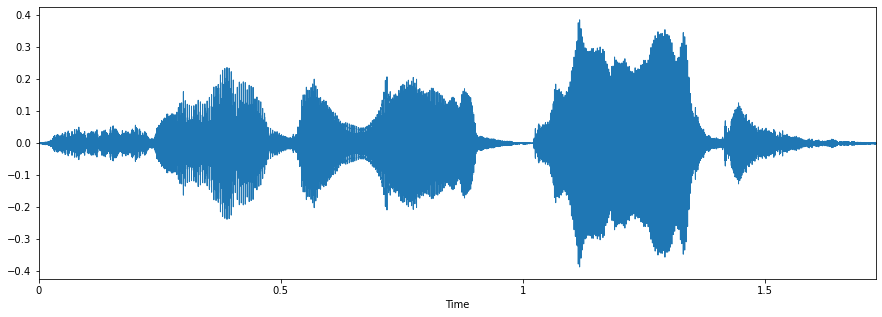

In [ ]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

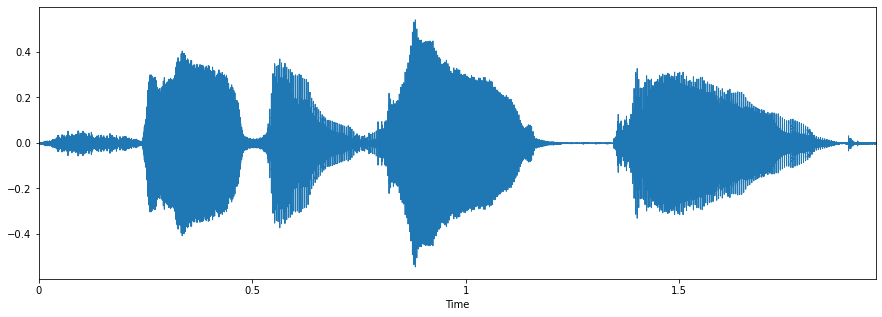

In [ ]:
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [ ]:
# creating dataframe CREMA_df with labels, source, path as columns

In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_disgust      671
male_fear         671
male_angry        671
male_sad          671
male_happy        671
female_sad        600
female_angry      600
female_happy      600
female_disgust    600
female_fear       600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [ ]:
# visualizing and playing audio from CREMA-D dataset

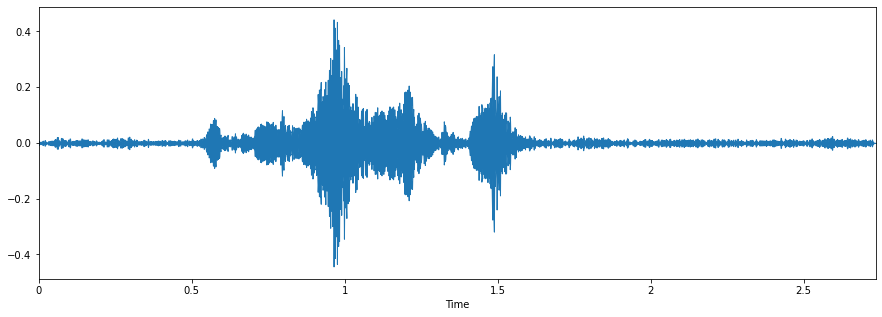

In [ ]:
# use the well known Librosa library for this task 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

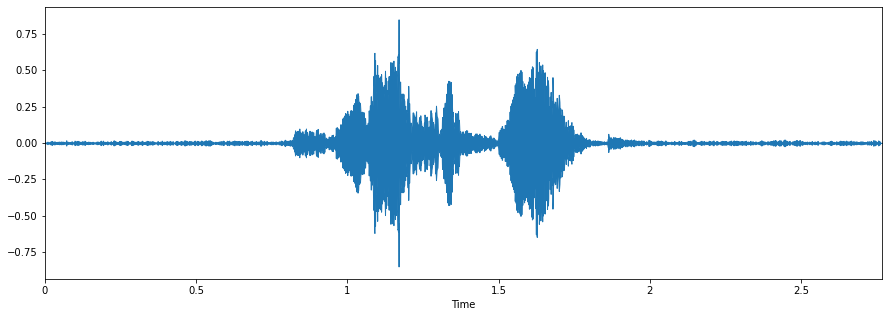

In [ ]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [ ]:
# combining all newly created dataframes into one single dataframe

In [ ]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_angry       1096
female_happy       1096
female_sad         1096
female_disgust     1096
female_fear        1096
female_neutral     1056
male_neutral        839
male_fear           827
male_angry          827
male_sad            827
male_disgust        827
male_happy          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


# Feature Extraction 

In [ ]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

In [ ]:
# mfcc feature extraction

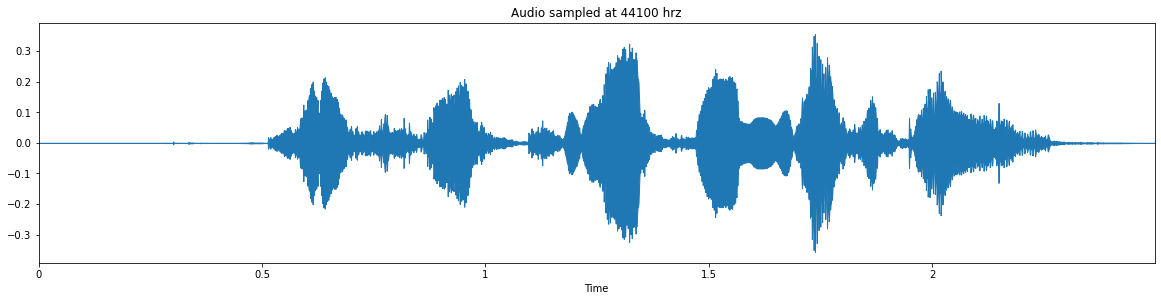

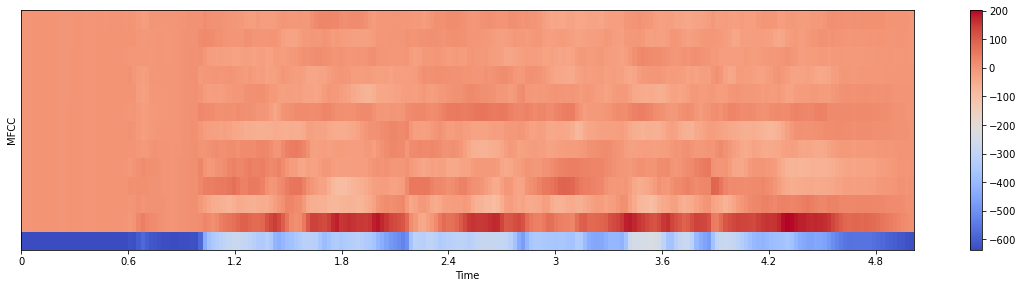

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


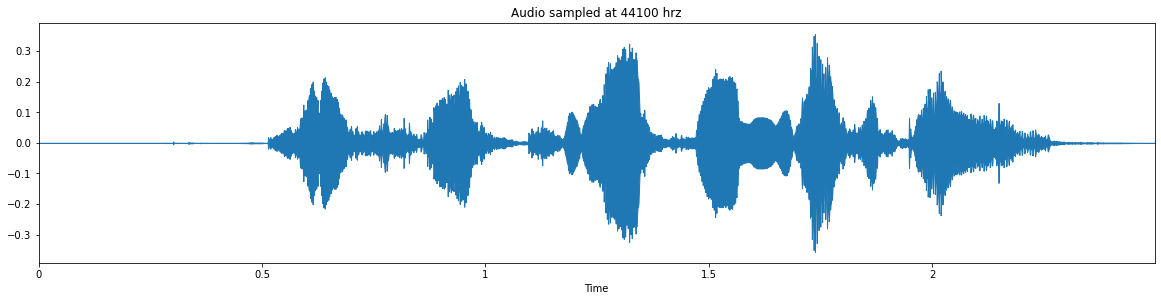

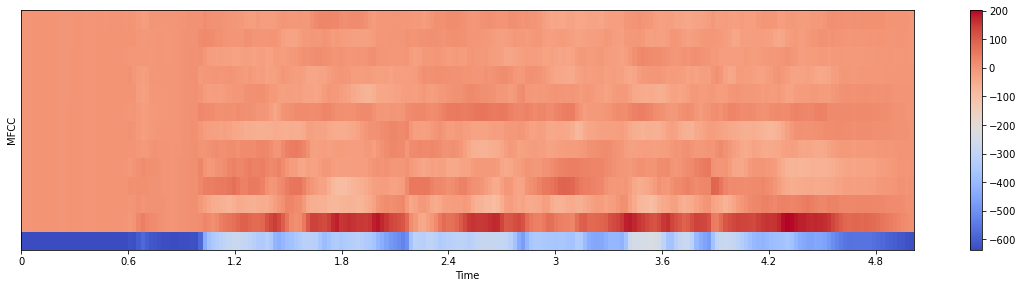

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


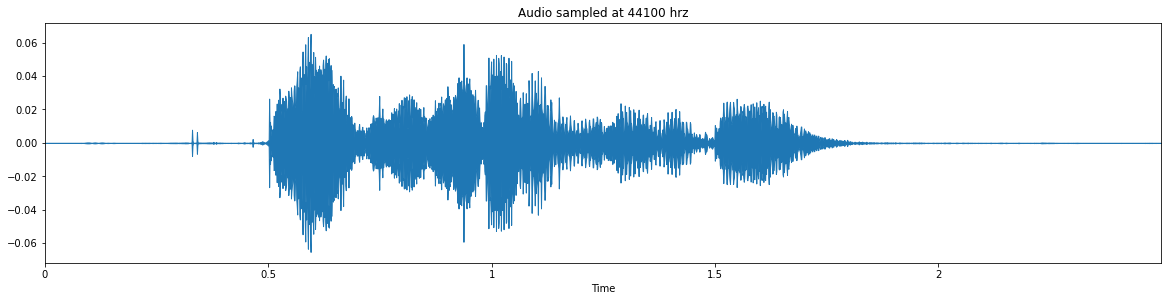

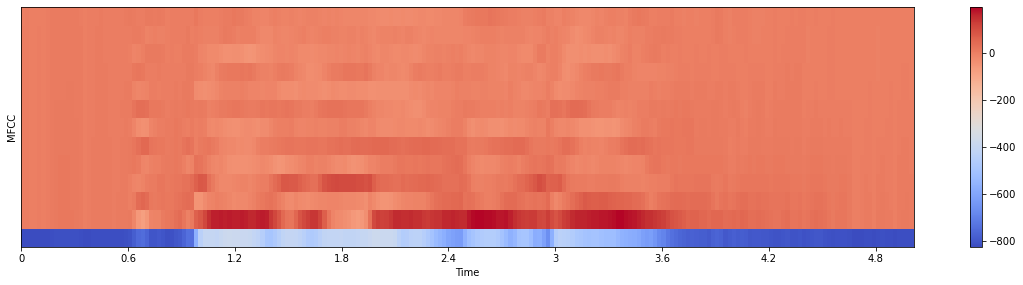

In [ ]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

In [ ]:
# statistical features

216
216


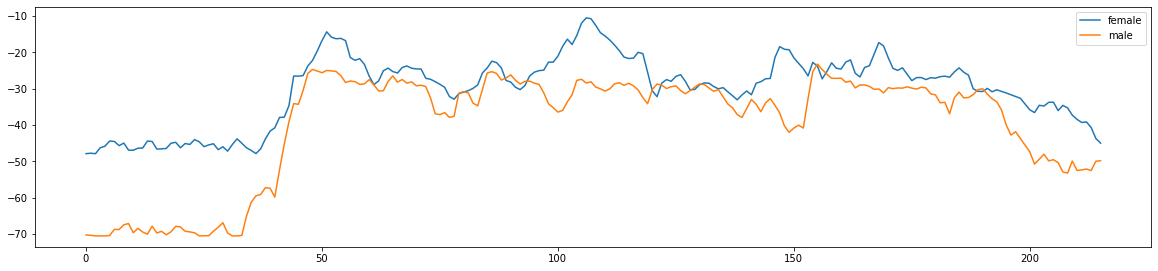

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


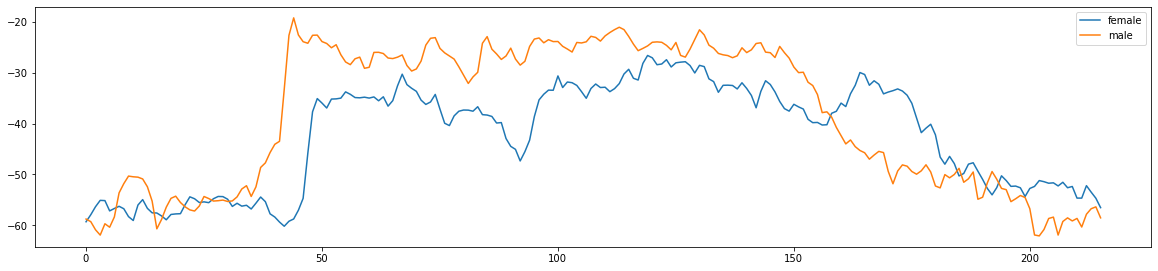

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "C:/Users/dell/Downloads/archive (3)/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

#  Model Creation

In [ ]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [ ]:
# data preparation

In [ ]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("C:/Users/dell/Downloads/Data_path.csv")
ref.head()

labels source                                               path
0  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a01...
1  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a02...
2  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a03...
3  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a04...
4  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a05...

In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

12162


feature
0  [-11.113932, -7.215757, -6.21919, -5.9265423, ...
1  [-24.449831, -22.465742, -22.928043, -23.24380...
2  [-25.000114, -24.520256, -24.178183, -23.84745...
3  [-1.529839, -4.333437, -12.285237, -13.083024,...
4  [-22.458635, -22.467833, -25.884357, -27.82704...

In [ ]:
# data processing

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                               path  \
0  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a01...   
1  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a02...   
2  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a03...   
3  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a04...   
4  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a05...   

           0          1          2          3          4          5  \
0 -11.113932  -7.215757  -6.219190  -5.926542  -5.850419  -4.808960   
1 -24.449831 -22.465742 -22.928043 -23.243807 -22.926605 -23.432241   
2 -25.000114 -24.520256 -24.178183 -23.847450 -15.182783 -10.732485   
3  -1.529839  -4.333437 -12.285237 -13.083024 -12.041327 -11.819768   
4 -22.458635 -22.467833 -25.884357 -27.827045 -27.593534 -26.666512   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234095  -5.310308   
1 -14.830002  ... -22.627258 -22.633406 -22.511599 -24.300154 -24.496809   
2  -8.681472  ...        NaN        NaN        NaN        NaN        NaN   
3  -9.414148  ...        NaN        NaN        NaN        NaN        NaN   
4 -18.659025  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621664  -6.072197  -6.611348  -2.509089   1.964608  
1 -22.895985 -23.511503 -24.342152 -24.530262 -25.457796  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4 -23.281618 -24.167494 -25.228062 -25.902941 -25.589964  

[5 rows x 219 columns]

In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


labels source                                               path  \
0  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a01...   
1  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a02...   
2  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a03...   
3  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a04...   
4  male_angry  SAVEE  C:/Users/dell/Downloads/archive (2)/ALL/DC_a05...   

           0          1          2          3          4          5  \
0 -11.113932  -7.215757  -6.219190  -5.926542  -5.850419  -4.808960   
1 -24.449831 -22.465742 -22.928043 -23.243807 -22.926605 -23.432241   
2 -25.000114 -24.520256 -24.178183 -23.847450 -15.182783 -10.732485   
3  -1.529839  -4.333437 -12.285237 -13.083024 -12.041327 -11.819768   
4 -22.458635 -22.467833 -25.884357 -27.827045 -27.593534 -26.666512   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234095  -5.310308   
1 -14.830002  ... -22.627258 -22.633406 -22.511599 -24.300154 -24.496809   
2  -8.681472  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
3  -9.414148  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
4 -18.659025  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621664  -6.072197  -6.611348  -2.509089   1.964608  
1 -22.895985 -23.511503 -24.342152 -24.530262 -25.457796  
2   0.000000   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000   0.000000  
4 -23.281618 -24.167494 -25.228062 -25.902941 -25.589964  

[5 rows x 219 columns]

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
4950  -18.611181 -17.616537 -18.411484 -18.987421 -17.404621 -16.747272   
3860  -10.786573 -14.882176 -23.087044 -22.467028 -20.362326 -19.076139   
9761   -1.533946  -4.030604  -9.614022 -12.045175  -9.992991 -11.926252   
7620   -4.531077  -3.933794  -4.567833  -5.871509  -5.282474  -6.490458   
11586 -20.621704 -21.587507 -20.563646 -20.703461 -21.205715 -18.608528   
7914  -17.514992 -18.551868 -17.043013 -16.977903 -19.369631 -19.562126   
9513  -18.740366 -18.824932 -16.149492 -16.963453 -18.229979 -18.183958   
5835  -19.066853 -18.328382 -17.710285 -18.043194 -18.252481 -18.710627   
5389  -20.760590 -20.047138 -18.961346 -19.468687 -19.316292 -18.162563   
11222 -18.252928 -17.727369 -19.222475 -18.469973 -17.572329 -17.850540   

             6          7          8          9    ...        206        207  \
4950  -17.733747 -18.055027 -17.931210 -15.913172  ... -22.899401 -21.647814   
3860  -19.761509 -13.231027 -11.808992 -16.756002  ...   0.000000   0.000000   
9761  -14.008467 -13.561556 -14.024567 -15.151947  ...   0.000000   0.000000   
7620   -8.156467  -9.188804  -8.681725  -8.212409  ...   0.000000   0.000000   
11586 -18.446671 -16.211843 -14.257653 -15.160404  ...   0.000000   0.000000   
7914  -22.008749 -20.178379 -17.989597 -19.336285  ...   0.000000   0.000000   
9513  -19.274342 -18.395124 -16.951286 -16.672031  ... -17.882132 -19.390713   
5835  -16.626354 -17.831005 -18.028345 -17.859106  ...   0.000000   0.000000   
5389  -18.102333 -19.914131 -20.931385 -19.215496  ...   0.000000   0.000000   
11222 -17.932026 -20.588900 -18.612185 -15.990727  ... -18.065437 -18.135092   

             208        209        210        211        212        213  \
4950  -19.758650 -18.879402 -19.397379 -20.171659 -22.689241 -24.612816   
3860    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9761    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7620    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11586   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7914    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9513  -17.779476 -19.165974   0.000000   0.000000   0.000000   0.000000   
5835    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5389    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11222 -19.665306 -20.741903 -20.273033 -18.371033 -15.576723 -17.512487   

             214        215  
4950  -24.153774 -22.703133  
3860    0.000000   0.000000  
9761    0.000000   0.000000  
7620    0.000000   0.000000  
11586   0.000000   0.000000  
7914    0.000000   0.000000  
9513    0.000000   0.000000  
5835    0.000000   0.000000  
5389    0.000000   0.000000  
11222 -17.008549 -18.195282  

[10 rows x 216 columns]

In [ ]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
4950   0.185662  0.302468  0.437165  0.387895  0.498989  0.543636  0.462580   
3860   0.732048  0.501149  0.089951  0.130028  0.280118  0.371251  0.312744   
9761   1.378151  1.289636  1.090478  0.902370  1.047452  0.900492  0.737849   
7620   1.168864  1.296670  1.465215  1.359888  1.396032  1.302854  1.170266   
11586  0.045269  0.013933  0.277342  0.260723  0.217707  0.405864  0.409900   
7914   0.262208  0.234506  0.538790  0.536816  0.353578  0.335278  0.146691   
9513   0.176641  0.214664  0.605144  0.537887  0.437912  0.437291  0.348742   
5835   0.153843  0.250744  0.489237  0.457870  0.436247  0.398307  0.544407   
5389   0.035570  0.125858  0.396332  0.352229  0.357525  0.438875  0.435344   
11222  0.210678  0.294414  0.376940  0.426242  0.486579  0.461971  0.447929   

            7         8         9    ...       206       207       208  \
4950   0.433146  0.435814  0.580897  ... -0.883216 -0.815256 -0.695046   
3860   0.788958  0.886902  0.518818  ...  0.540193  0.526315  0.525757   
9761   0.764579  0.723657  0.636966  ...  0.540193  0.526315  0.525757   
7620   1.087108  1.117321  1.148100  ...  0.540193  0.526315  0.525757   
11586  0.569097  0.706483  0.636343  ...  0.540193  0.526315  0.525757   
7914   0.276530  0.431512  0.328767  ...  0.540193  0.526315  0.525757   
9513   0.408061  0.508015  0.525003  ... -0.571347 -0.675378 -0.572761   
5835   0.449669  0.428657  0.437569  ...  0.540193  0.526315  0.525757   
5389   0.296021  0.214760  0.337663  ...  0.540193  0.526315  0.525757   
11222  0.246251  0.385639  0.575185  ... -0.582741 -0.597564 -0.689279   

            209       210       211       212       213       214       215  
4950  -0.633007 -0.679832 -0.722842 -0.865393 -0.989019 -0.972385 -0.882535  
3860   0.526696  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
9761   0.526696  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
7620   0.526696  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
11586  0.526696  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
7914   0.526696  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
9513  -0.650610  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
5835   0.526696  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
5389   0.526696  0.511816  0.512069  0.512981  0.501471  0.496906  0.492873  
11222 -0.747414 -0.733626 -0.612608 -0.433306 -0.559041 -0.537736 -0.609439  

[10 rows x 216 columns]

In [ ]:
max_data = np.max(X_train)
min_data = np.min(X_train)
X_train = (X_train-min_data)/(max_data-min_data+1e-6)
X_train =  X_train-0.5

max_data = np.max(X_test)
min_data = np.min(X_test)
X_test = (X_test-min_data)/(max_data-min_data+1e-6)
X_test =  X_test-0.5

X_train[150:160]

0         1         2         3         4         5         6    \
4950   0.225976  0.260507  0.229571  0.232577  0.280537  0.281269  0.273993   
3860   0.309003  0.290466  0.179858  0.195113  0.247379  0.255380  0.251344   
9761   0.407182  0.409360  0.323110  0.307322  0.363627  0.334861  0.315603   
7620   0.375380  0.410421  0.376764  0.373792  0.416435  0.395287  0.380968   
11586  0.204642  0.217000  0.206688  0.214101  0.237924  0.260578  0.266030   
7914   0.237607  0.250259  0.244121  0.254213  0.258507  0.249978  0.226243   
9513   0.224605  0.247267  0.253622  0.254368  0.271284  0.265298  0.256786   
5835   0.221141  0.252708  0.237027  0.242743  0.271032  0.259443  0.286362   
5389   0.203168  0.233876  0.223725  0.227395  0.259105  0.265536  0.269876   
11222  0.229777  0.259293  0.220948  0.238148  0.278657  0.269004  0.271779   

            7         8         9    ...       206       207       208  \
4950   0.271421  0.271275  0.308196  ...  0.194599  0.211055  0.238353   
3860   0.325374  0.339613  0.298617  ...  0.492531  0.492602  0.486273   
9761   0.321677  0.314882  0.316847  ...  0.492531  0.492602  0.486273   
7620   0.370583  0.374520  0.395711  ...  0.492531  0.492602  0.486273   
11586  0.292036  0.312280  0.316750  ...  0.492531  0.492602  0.486273   
7914   0.247673  0.270624  0.269293  ...  0.492531  0.492602  0.486273   
9513   0.267617  0.282214  0.299571  ...  0.259876  0.240411  0.263187   
5835   0.273926  0.270191  0.286081  ...  0.492531  0.492602  0.486273   
5389   0.250628  0.237787  0.270666  ...  0.492531  0.492602  0.486273   
11222  0.243081  0.263674  0.307314  ...  0.257492  0.256741  0.239524   

            209       210       211       212       213       214       215  
4950   0.252237  0.235715  0.238385  0.214614  0.171467  0.164676  0.139370  
3860   0.492898  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
9761   0.492898  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
7620   0.492898  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
11586  0.492898  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
7914   0.492898  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
9513   0.248584  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
5835   0.492898  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
5389   0.492898  0.491642  0.495417  0.500000  0.494098  0.472364  0.410042  
11222  0.228495  0.224162  0.261329  0.304076  0.264540  0.255697  0.193114  

[10 rows x 216 columns]

In [ ]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

In [ ]:
# modelling

In [ ]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 216, 256)          2304      
_________________________________________________________________
activation_45 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_10 (Batc (None, 216, 256)          1024      
_________________________________________________________________
activation_46 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 27, 256)          

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
571/571 [==============================] - 121s 207ms/step - loss: 2.5188 - accuracy: 0.1588 - val_loss: 2.5287 - val_accuracy: 0.1634
Epoch 2/100
571/571 [==============================] - 120s 210ms/step - loss: 2.2759 - accuracy: 0.2448 - val_loss: 2.3955 - val_accuracy: 0.1641
Epoch 3/100
571/571 [==============================] - 120s 210ms/step - loss: 2.1635 - accuracy: 0.2752 - val_loss: 2.3477 - val_accuracy: 0.1772
Epoch 4/100
571/571 [==============================] - 121s 211ms/step - loss: 2.0816 - accuracy: 0.3001 - val_loss: 2.3230 - val_accuracy: 0.1845
Epoch 5/100
571/571 [==============================] - 120s 211ms/step - loss: 2.0105 - accuracy: 0.3115 - val_loss: 2.3119 - val_accuracy: 0.1818
Epoch 6/100
571/571 [==============================] - 120s 211ms/step - loss: 1.9844 - accuracy: 0.3193 - val_loss: 2.2966 - val_accuracy: 0.1841
Epoch 7/100
571/571 [==============================] - 122s 213ms/step - loss: 1.9500 - accuracy: 0.3190 - val_loss: 2

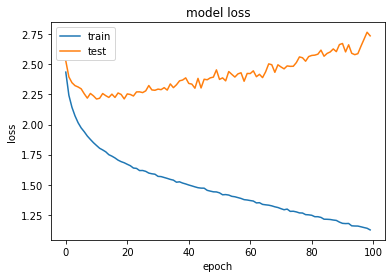

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model saving

In [ ]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\dell\Downloads\saved_models\Emotion_Model.h5 


In [ ]:
# model validation

In [ ]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 17.79%


In [ ]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

191/191 [==============================] - 7s 37ms/step


array([2, 2, 7, ..., 2, 7, 7], dtype=int64)

In [ ]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170        male_sad    female_happy
171  female_neutral     female_fear
172      male_angry      male_angry
173  female_disgust     female_fear
174      male_angry      male_angry
175     female_fear    female_happy
176    male_neutral    male_neutral
177     female_fear     female_fear
178    female_happy     female_fear
179  female_neutral    female_happy

In [ ]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              147
female_disgust            135
female_fear               492
female_happy             1146
female_neutral              4
female_sad                210
female_surprise            62
male_angry                410
male_disgust              184
male_fear                  12
male_happy                  6
male_neutral              168
male_sad                   65

In [ ]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'


0.17790200591910554


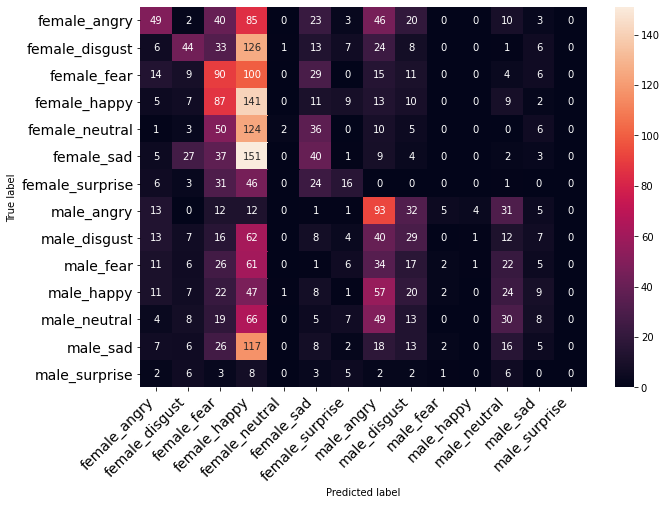

In [ ]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.33      0.17      0.23       281
 female_disgust       0.33      0.16      0.22       269
    female_fear       0.18      0.32      0.23       278
   female_happy       0.12      0.48      0.20       294
 female_neutral       0.50      0.01      0.02       237
     female_sad       0.19      0.14      0.16       279
female_surprise       0.26      0.13      0.17       127
     male_angry       0.23      0.44      0.30       209
   male_disgust       0.16      0.15      0.15       199
      male_fear       0.17      0.01      0.02       192
     male_happy       0.00      0.00      0.00       209
   male_neutral       0.18      0.14      0.16       209
       male_sad       0.08      0.02      0.04       220
  male_surprise       0.00      0.00      0.00        38

       accuracy                           0.18      3041
      macro avg       0.19      0.16      0.14      3041
   weighted avg       0.21   

0.7083196317000987


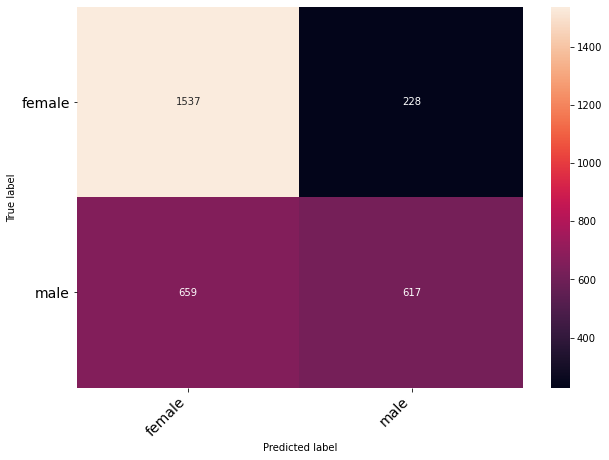

In [ ]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)


In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.70      0.87      0.78      1765
        male       0.73      0.48      0.58      1276

    accuracy                           0.71      3041
   macro avg       0.72      0.68      0.68      3041
weighted avg       0.71      0.71      0.69      3041



0.23150279513317987


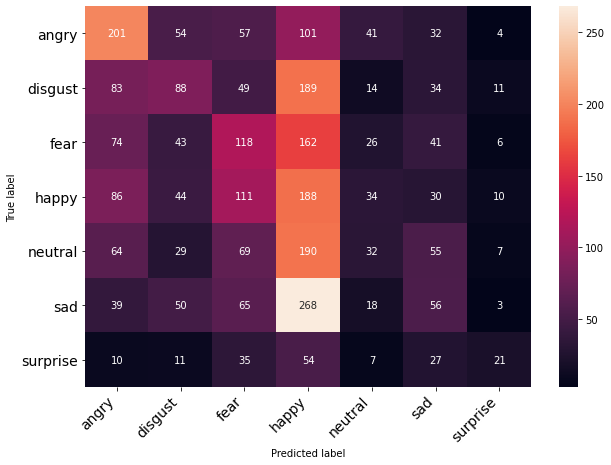

In [ ]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)


In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.36      0.41      0.38       490
     disgust       0.28      0.19      0.22       468
        fear       0.23      0.25      0.24       470
       happy       0.16      0.37      0.23       503
     neutral       0.19      0.07      0.10       446
         sad       0.20      0.11      0.14       499
    surprise       0.34      0.13      0.19       165

    accuracy                           0.23      3041
   macro avg       0.25      0.22      0.22      3041
weighted avg       0.24      0.23      0.22      3041



# Applying to new audio data 

In [ ]:
# Importing required libraries 
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras 
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook
import pyaudio

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
# recording audio

In [ ]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 
CHANNELS = 2 
RATE = 44100 
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "testing.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()


* recording
* done recording


In [ ]:
data, sampling_rate = librosa.load('C:/Users/dell/Downloads/testing.wav')
ipd.Audio('C:/Users/dell/Downloads/testing.wav')

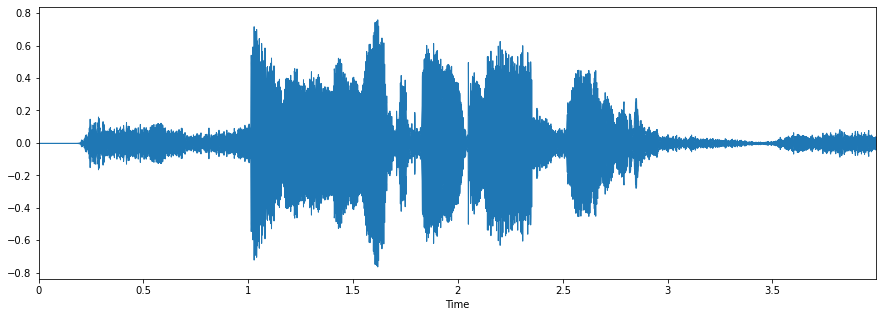

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
# data preparation and prediction

In [ ]:
# loading json and model architecture 
json_file = open('C:/Users/dell/Downloads/model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("C:/Users/dell/Downloads/saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# the optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [ ]:
# Lets transform the dataset so we can apply the predictions
X, sample_rate = librosa.load('C:/Users/dell/Downloads/testing.wav'
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0         1         2         3         4         5         6    \
0 -4.648355 -5.605184 -8.269398 -7.417672 -7.396862 -9.605966 -9.034763   

         7          8          9    ...       206        207        208  \
0 -11.449537 -13.765492 -12.003599  ... -8.771608 -10.280178 -12.185337   

        209       210        211        212        213        214        215  
0 -13.04194 -11.58636 -10.707992 -12.227929 -13.346519 -13.274975 -10.276252  

[1 rows x 216 columns]

In [ ]:
# Apply predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 180ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.6484869e-17, 0.0000000e+00,
        4.7518693e-27, 1.0000000e+00, 7.6101316e-14, 4.9072440e-32,
        2.1054580e-31, 6.1033442e-32, 0.0000000e+00, 0.0000000e+00,
        9.4757513e-10, 0.0000000e+00]], dtype=float32)

In [ ]:
filename = 'C:/Users/dell/Downloads/labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['female_sad']


In [ ]:
import speech_recognition as sr

sound = "C:/Users/dell/Downloads/testing.wav"
r = sr.Recognizer()

with sr.AudioFile(sound) as source:
    r.adjust_for_ambient_noise(source)
    print("Converting Audio To Text ..... ")
    audio = r.listen(source)

    try:
        print("Converted Audio Is : \n" + r.recognize_google(audio))

    except Exception as e:
        print("Error {} : ".format(e) )

Converting Audio To Text ..... 
Converted Audio Is : 
I don't know what's going to happen


# **KHUSHI VOICE ASSISTANT CODE**

## **HOW WE STARTED ?**

This approach had a major flaw that client side and server side application got intermixed because we were performing text to speech and speech to text conversions at our backend side due to which we had only 2 options i.e. to render html pages and make a web application or to make a Python Tkinter GUI.Therefore, we can say that our application wasn't scalable or extendable.

In [ ]:
import subprocess
import wolframalpha
import pyttsx3
import json
import random
import operator
import speech_recognition as sr
import datetime
import wikipedia
import webbrowser
import os
import winshell
import pyjokes
import feedparser
import smtplib
import ctypes
import time
import requests
import shutil
from clint.textui import progress
from ecapture import ecapture as ec
from bs4 import BeautifulSoup
import win32com.client as wincl
from urllib.request import urlopen

In [ ]:
engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[0].id)

In [ ]:
def speak(audio):
    engine.say(audio)
    engine.runAndWait()

def wishMe():
    hour = int(datetime.datetime.now().hour)
    if hour>= 0 and hour<12:
        speak("Good Morning Ma'am !")
  
    elif hour>= 12 and hour<18:
        speak("Good Afternoon Ma'am !")   
  
    else:
        speak("Good Evening Ma'am !")
    assname="Khushi"
    speak("I am your Assistant")
    speak(assname)
     
def usrname():
    speak("What should i call you Ma'am")
    uname = takeCommand()
    speak("Welcome Miss")
    speak(uname)
    columns = shutil.get_terminal_size().columns
     
    print("#####################".center(columns))
    print("Welcome Ms.", uname.center(columns))
    print("#####################".center(columns))
     
    speak("How can i Help you, Ma'am")
    
def takeCommand():
     
    r = sr.Recognizer()
     
    with sr.Microphone() as source:
         
        print("Listening...")
        r.pause_threshold = 1
        audio = r.listen(source)
  
    try:
        print("Recognizing...")    
        query = r.recognize_google(audio, language ='en-in')
        print(f"User said: {query}\n")
  
    except Exception as e:
        print(e)    
        print("Unable to Recognize your voice.")  
        return "None"
     
    return query

In [ ]:
if __name__ == '__main__':
    clear = lambda: os.system('cls')
     
   
    clear()
    wishMe()
    usrname()
     
    while True:
         
        query = takeCommand().lower()
         
        if 'wikipedia' in query:
            speak('Searching Wikipedia...')
            query = query.replace("wikipedia", "")
            results = wikipedia.summary(query, sentences = 3)
            speak("According to Wikipedia")
            print(results)
            speak(results)
 
        elif 'open youtube' in query:
            speak("Here you go to Youtube\n")
            webbrowser.open("youtube.com")
 
        elif 'open google' in query:
            speak("Here you go to Google\n")
            webbrowser.open("google.com")
 
        elif 'open stackoverflow' in query:
            speak("Here you go to Stack Over flow.Happy coding")
            webbrowser.open("stackoverflow.com")   
 
        elif 'play music' in query or "play song" in query:
            speak("Here you go with music")
            # music_dir = "G:\\Song"
            music_dir = "C:\Photoshop 1\Music\OBeta.mp3"    
            random = os.startfile(music_dir)
 
        elif 'the time' in query:
            strTime = datetime.datetime.now().strftime("%H:%M:%S")    
            speak(f"Sir, the time is {strTime}")
            print("Sir, the time is",strTime)
 
        elif 'how are you' in query:
            speak("I am fine, Thank you.")
            speak("How are you, Ma'am")
            print("I am fine, Thank you. How are you Ma'am ?")
            
        elif "Good Morning" in query:
            speak("A warm" +query)
            speak("How are you Ma'am")
            print("A warm "+query+"Ma'am")
 
        elif 'fine' in query or "good" in query:
            speak("It's good to know that your fine")
            print("It's good to know that your fine")
 
        elif "change my name to" in query:
            query = query.replace("change my name to", "")
            assname = query
 
        elif "change name" in query:
            speak("What would you like to call me, Sir ")
            print("What would you like to call me, Sir ?")
            assname=takeCommand()
            speak("Thanks for naming me")
            print("Thanks for naming me")
 
        elif "what's your name" in query or "What is your name" in query:
            speak("My friends call me Khushi")
            print("My friends call me Khushi ")
 
        elif 'exit' in query:
            speak("Thanks for giving me your time")
            print("Thanks for giving me your time")
            exit()
 
        elif "who made you" in query or "who created you" in query: 
            speak("I have been created by Miss Mahima Munjal")
            print("I have been created by Miss Mahima Munjal")
             
        elif 'joke' in query:
            speak(pyjokes.get_joke())
            print(pyjokes.get_joke())
             
        elif "calculate" in query: 
             
            app_id = "YVLRKJ-ATQ4QXE5KH"
            client = wolframalpha.Client(app_id)
            indx = query.lower().split().index('calculate') 
            query = query.split()[indx + 1:] 
            res = client.query(' '.join(query)) 
            answer = next(res.results).text
            print("The answer is " + answer) 
            speak("The answer is " + answer) 
 
        elif 'search' in query or 'play' in query:
             
            query = query.replace("search", "") 
            query = query.replace("play", "")          
            webbrowser.open(query) 
 
 
        elif "why you came to world" in query:
            speak("Thanks to Mahima. further It's a secret")
            print("Thanks to Mahima. further It's a secret")
 
        
 
        elif 'is love' in query:
            speak("It is 7th sense that destroy all other senses")
            print("It is 7th sense that destroy all other senses.")
 
        elif "who are you" in query:
            speak("I am your virtual assistant created by Miss Mahima Munjal.")
            print("I am your virtual assistant created by Miss Mahima Munjal.")
 
        elif 'reason for you' in query:
            speak("I was created as a Major project by Miss Mahima Munjal")
            print("I was created as a Major project by Miss Mahima Munjal")
 
        elif 'news' in query:
             
            try: 
                jsonObj = urlopen('''https://newsapi.org / v1 / articles?source = the-times-of-india&sortBy = top&apiKey =\\times of India Api key\\''')
                data = json.load(jsonObj)
                i = 1
                 
                speak('here are some top news from the times of india')
                print('''=============== TIMES OF INDIA ============'''+ '\n')
                 
                for item in data['articles']:
                     
                    print(str(i) + '. ' + item['title'] + '\n')
                    print(item['description'] + '\n')
                    speak(str(i) + '. ' + item['title'] + '\n')
                    i += 1
            except Exception as e:
                 
                print(str(e))
 
         
        elif 'lock window' in query:
                speak("locking the device")
                print("locking the device")
                ctypes.windll.user32.LockWorkStation()
 
        elif 'shutdown system' in query:
                speak("Hold On a Sec ! Your system is on its way to shut down")
                print("Hold On a Sec ! Your system is on its way to shut down")
                subprocess.call('shutdown / p /f')
                 
        elif 'empty recycle bin' in query:
            winshell.recycle_bin().empty(confirm = False, show_progress = False, sound = True)
            print("Recycle Bin Recycled")
            speak("Recycle Bin Recycled")
 
        elif "don't listen" in query or "stop listening" in query:
            speak("for how much time you want to stop jarvis from listening commands")
            print("for how much time you want to stop jarvis from listening commands")
            a = int(takeCommand())
            time.sleep(a)
            print(a)
 
        elif "where is" in query:
            query = query.replace("where is", "")
            location = query
            speak("User asked to Locate")
            speak(location)
            webbrowser.open("https://www.google.nl / maps / place/" + location + "")
 
        elif "camera" in query or "take a photo" in query:
            ec.capture(0, "Jarvis Camera ", "img.jpg")
 
        elif "restart" in query:
            subprocess.call(["shutdown", "/r"])
             
        elif "hibernate" in query or "sleep" in query:
            speak("Hibernating")
            subprocess.call("shutdown / h")
 
        elif "log off" in query or "sign out" in query:
            speak("Make sure all the application are closed before sign-out")
            time.sleep(5)
            subprocess.call(["shutdown", "/l"])
 
        elif "write a note" in query:
            speak("What should i write, sir")
            note = takeCommand()
            file = open('jarvis.txt', 'w')
         
        elif "show note" in query:
            speak("Showing Notes")
            file = open("jarvis.txt", "r") 
            print(file.read())
            speak(file.read(6))
                     
        # NPPR9-FWDCX-D2C8J-H872K-2YT43
        elif "Khushi" in query:
            speak("Khushi 1 point o in your service Ma'am")
            print("Khushi 1 point o in your service Ma'am")
            
        elif "am ill" in query:
            speak("Take proper care of yourself. I am there for you.")
            print("Take proper care of yourself. I am there for you.")
            
        elif "is ill" in query:
            speak("Take proper care of your loved ones")
            print("Take proper care of your loved ones")
            
        elif "feeling bad" in query:
            speak("Talk to me.Maybe you will feel better. What's the problem ?")
            print("Talk to me.Maybe you will feel better. What's the problem ?")
                
        elif "nobody loves me" or "no one loves me" in query:
            speak("I love you my dear friend. You are an awesome friend and a great companion to me.")
            print("I love you my dear friend. You are an awesome friend and a great companion to me.")
        elif "hungry" in query:
            speak("Eat some fruits. Stay helthy stay fit.")
            print("Eat some fruits. Stay helthy stay fit.")
            
        elif "won" or "winning" or "winner" in query:
            speak("Congratulations. Your hard work finally paid off.")
            print("Congratulations.Your hard work finally paid off.")
        
        elif "loser" in query:
            speak("You are not a loser. It's just a bad phase. It will pass. keep working hard. I believe in you. you should also believe in yourself.")
            print("You are not a loser. It's just a bad phase. It will pass. keep working hard. I believe in you. you should also believe in yourself.")
        
        elif "what to do" in query:
            speak("You should just sleep for sometime. you will feel relaxed.")
            print("You should just sleep for sometime. you will feel relaxed.")
            
        elif "cry" or "crying" or "weeping" in query:
            speak("Okay. Cry if you feel like crying but whenever you want to talk, I am here for you.")
            print("Okay. Cry if you feel like crying but whenever you want to talk, I am here for you.")
            
        elif "thanks" or "thankyou" in query:
            speak("Dosti main no sorry and no thankyou.")
            print("Dosti main no sorry and no thankyou.")
                
        elif "will you be my gf" in query or "will you be my bf" in query:   
            speak("I'm not sure about, may be you should give me some time")
            print("I'm not sure about, may be you should give me some time")
            
        elif "how are you" in query:
            speak("I'm fine, glad you me that")
            print("I'm fine, glad you me that")
 
        elif "i love you" in query:
            speak("I love you too.")
            print("I love you too.")
            
        elif "how are you" in query:
            speak("I'm fine. Thanks for asking.How are you ?")
            print("I'm fine. Thanks for asking.How are you ?")
        
        elif "sad" in query:
            speak("What makes you feel sad ?. I am here to listen to you.")
            print("What makes you feel sad ?. I am here to listen to you.")
            
        elif "low" in query:
            speak("What makes you feel low ?. I am here to listen to you.")
            print("What makes you feel low ?. I am here to listen to you.")
       
 
        elif "weather" in query:
             
            # Google Open weather website
            # to get API of Open weather 
            api_key = "906a7ea339b24a797b9fa5f79a8af495"
            base_url = "http://api.openweathermap.org / data / 2.5 / weather?"
            speak(" City name ")
            print("City name : ")
            city_name = takeCommand()
            complete_url = base_url + "appid =" + api_key + "&q =" + city_name
            response = requests.get(complete_url) 
            x = response.json() 
             
            if x["cod"] != "404": 
                y = x["main"] 
                current_temperature = y["temp"] 
                current_pressure = y["pressure"] 
                current_humidiy = y["humidity"] 
                z = x["weather"] 
                weather_description = z[0]["description"] 
                print(" Temperature (in kelvin unit) = " +str(current_temperature)+"\n atmospheric pressure (in hPa unit) ="+str(current_pressure) +"\n humidity (in percentage) = " +str(current_humidiy) +"\n description = " +str(weather_description)) 
             
            else: 
                speak(" City Not Found ")
 
        elif "wikipedia" in query:
            webbrowser.open("wikipedia.com")
 
        # most asked question from google Assistant
    
        elif "breakup" or "broke up" in query:
            speak("Don't worry everything will be okay. Just move on in life. Your happiness matters the most.")
            print("Don't worry everything will be okay. Just move on in life. Your happiness matters the most.")
            
        elif "not happy" in query:
            speak("What makes you feel sad ?. I am here to listen to you.")
            print("What makes you feel sad ?. I am here to listen to you.")
 
        elif "am happy" in query:
            speak("Your happiness makes Khushi happy. That's what I am for. Good to know that you are happy.")
            print("Your happiness makes Khushi happy. That's what I am for. Good to know that you are happy.")
            
        elif "failure" or "failed" or "lost" or "lose" in query:
            speak("Success and failure are a part and parcel of life. Try harder and you will surely succeed.")
            print("Success and failure are a part and parcel of life. Try harder and you will surely succeed.")
        
        elif "where is" in query:
            query = query.replace("where is", "")
            location = query
            speak("User asked to Locate")
            speak(location)
            webbrowser.open("https://www.google.nl / maps / place/" + location + "")
 
        elif "camera" in query or "take a photo" in query:
            ec.capture(0, "Jarvis Camera ", "img.jpg")
 
        elif "restart" in query:
            subprocess.call(["shutdown", "/r"])
             
        elif "hibernate" in query or "sleep" in query:
            speak("Hibernating")
            subprocess.call("shutdown / h")
 
        elif "log off" in query or "sign out" in query:
            speak("Make sure all the application are closed before sign-out")
            time.sleep(5)
            subprocess.call(["shutdown", "/l"])
 
        elif "write a note" in query:
            speak("What should i write, sir")
            note = takeCommand()
            file = open('jarvis.txt', 'w')
         
        elif "show note" in query:
            speak("Showing Notes")
            file = open("jarvis.txt", "r") 
            print(file.read())
            speak(file.read(6))
                     
        # NPPR9-FWDCX-D2C8J-H872K-2YT43
        elif "Khushi" in query:
            wishMe("Khushi")
            speak("Khushi 1 point o in your service Ma'am")
            
        elif 'power point presentation' or 'ppt' in query:
            speak("opening Power Point presentation")
            power = r"C:\Desktop\Khushi_Voice_Assistant.pptx"
            os.startfile(power)
            print("Opening Power Point presentation")
        
        
        elif "what is" in query or "who is" in query:
             
            # Use the same API key 
            # that we have generated earlier
            client = wolframalpha.Client("906a7ea339b24a797b9fa5f79a8af495")
            res = client.query(query)
             
            try:
                print (next(res.results).text)
                speak (next(res.results).text)
            except StopIteration:
                print ("No results")
        else:
            speak("Sorry, I couln't recognize what you just said.")

This approach had a major flaw that client side and server side application got intermixed because we were performing text to speech and speech to text conversions at our backend side due to which we had only 2 options i.e. to render html pages and make a web application or to make a Python Tkinter GUI.Therefore, we can say that our application wasn't scalable.

## **NEW APPROACH (BIFURCATION OF CLIENT SIDE AND SERVER SIDE APPLICATION)**


> CLIENT SIDE - ANDROID STUDIO


> SERVER SIDE - PYTHON FLASK SERVER RESTFUL API


> ### **BENEFITS OF NEW APPROACH**


*   Scalable Application - Client Side application can be anything i.e. android app, flutter app, web application or an angular application
*   Client Side and Server Side Applications became independent of each other. Hence changes in environment of one application won't affect other application.
*   Feasibility and deployment of application became easy











In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re

In [59]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.xls to Dataset (4).xls


In [67]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['Dataset.xls']))
df

User Input  ... Actual Emotion
0               hello khushi  ...        Neutral
1                how are you  ...        Neutral
2              feeling happy  ...          Happy
3                      happy  ...          Happy
4             got good grade  ...          Happy
5              got bad grade  ...            Sad
6               cleared test  ...          Happy
7                 pass exams  ...          Happy
8                  pass exam  ...          Happy
9               passed exams  ...          Happy
10              got selected  ...          Happy
11           won competition  ...          Happy
12         said yes proposal  ...          Happy
13               failed exam  ...            Sad
14                   failure  ...            Sad
15                      fail  ...            Sad
16                     loser  ...            Sad
17                   suicide  ...            Sad
18                  want die  ...            Sad
19                   fought   ...            Sad
20                     fight  ...            Sad
21                      died  ...            Sad
22       won the competition  ...          Happy
23                    winner  ...          Happy
24                   winning  ...          Happy
25                i love you  ...          Happy
26                i miss you  ...          Happy
27                i miss her  ...            Sad
28                i miss him  ...            Sad
29                I hate her  ...            Sad
30                I hate him  ...            Sad
31           nobody loves me  ...            Sad
32                    am ill  ...            Sad
33                    is ill  ...            Sad
34                what to do  ...        Neutral
35                  thankyou  ...        Neutral
36                       sad  ...            Sad
37                 not happy  ...            Sad
38         will you be my gf  ...        Neutral
39                       cry  ...            Sad
40                    crying  ...            Sad
41                      weep  ...            Sad
42                   weeping  ...            Sad
43  will you be my girfriend  ...        Neutral
44          want kill myself  ...          Happy
45              feeling nice  ...            Sad
46            feeling gloomy  ...            Sad
47         feeling destroyed  ...            Sad
48               got scolded  ...            Sad
49                       bye  ...        Neutral
50         talk to you later  ...        Neutral

[51 rows x 3 columns]

## VADER MODEL FOR SENTIMENT ANALYSIS

In [53]:
! pip install vaderSentiment

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
obj = SentimentIntensityAnalyzer()

In [69]:
scores=[]
for i in df["User Input"]:
  scores.append(obj.polarity_scores(i))
df["Scores"]=scores
df

User Input  ...                                             Scores
0               hello khushi  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1                how are you  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2              feeling happy  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
3                      happy  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
4             got good grade  ...  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...
5              got bad grade  ...  {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...
6               cleared test  ...  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...
7                 pass exams  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8                  pass exam  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9               passed exams  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10              got selected  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11           won competition  ...  {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...
12         said yes proposal  ...  {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...
13               failed exam  ...  {'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'comp...
14                   failure  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
15                      fail  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
16                     loser  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
17                   suicide  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
18                  want die  ...  {'neg': 0.75, 'neu': 0.0, 'pos': 0.25, 'compou...
19                   fought   ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
20                     fight  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
21                      died  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
22       won the competition  ...  {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...
23                    winner  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
24                   winning  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
25                i love you  ...  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...
26                i miss you  ...  {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...
27                i miss her  ...  {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...
28                i miss him  ...  {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...
29                I hate her  ...  {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp...
30                I hate him  ...  {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp...
31           nobody loves me  ...  {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...
32                    am ill  ...  {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...
33                    is ill  ...  {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...
34                what to do  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
35                  thankyou  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
36                       sad  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
37                 not happy  ...  {'neg': 0.75, 'neu': 0.25, 'pos': 0.0, 'compou...
38         will you be my gf  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
39                       cry  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
40                    crying  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
41                      weep  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
42                   weeping  ...  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
43  will you be my girfriend  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
44          want kill myself  ...  {'neg': 0.671, 'neu': 0.143, 'pos': 0.186, 'co...
45              feeling nice  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
46            feeling g

In [70]:
compound=[]
for i in df["Scores"]:
  compound.append(i["compound"])
df["Compound"]=compound
df

User Input  ... Compound
0               hello khushi  ...   0.0000
1                how are you  ...   0.0000
2              feeling happy  ...   0.6369
3                      happy  ...   0.5719
4             got good grade  ...   0.4404
5              got bad grade  ...  -0.5423
6               cleared test  ...   0.1027
7                 pass exams  ...   0.0000
8                  pass exam  ...   0.0000
9               passed exams  ...   0.0000
10              got selected  ...   0.0000
11           won competition  ...   0.5719
12         said yes proposal  ...   0.4019
13               failed exam  ...  -0.5106
14                   failure  ...  -0.5106
15                      fail  ...  -0.5423
16                     loser  ...  -0.5267
17                   suicide  ...  -0.6705
18                  want die  ...  -0.5574
19                   fought   ...  -0.3182
20                     fight  ...  -0.3818
21                      died  ...  -0.5574
22       won the competition  ...   0.5719
23                    winner  ...   0.5859
24                   winning  ...   0.5267
25                i love you  ...   0.6369
26                i miss you  ...  -0.1531
27                i miss her  ...  -0.1531
28                i miss him  ...  -0.1531
29                I hate her  ...  -0.5719
30                I hate him  ...  -0.5719
31           nobody loves me  ...   0.5719
32                    am ill  ...  -0.4215
33                    is ill  ...  -0.4215
34                what to do  ...   0.0000
35                  thankyou  ...   0.0000
36                       sad  ...  -0.4767
37                 not happy  ...  -0.4585
38         will you be my gf  ...   0.0000
39                       cry  ...  -0.4767
40                    crying  ...  -0.4767
41                      weep  ...  -0.5719
42                   weeping  ...  -0.4404
43  will you be my girfriend  ...   0.0000
44          want kill myself  ...  -0.6597
45              feeling nice  ...   0.5106
46            feeling gloomy  ...  -0.0258
47         feeling destroyed  ...  -0.4019
48               got scolded  ...   0.0000
49                       bye  ...   0.0000
50         talk to you later  ...   0.0000

[51 rows x 5 columns]

In [71]:
predicted_emotions=[]
for i in df["Compound"]:
  if i==0:
    predicted_emotions.append("Neutral")
  elif i>0:
    predicted_emotions.append("Happy")
  else:
    predicted_emotions.append("Sad")

df["Predicted Emotions"]=predicted_emotions
df

User Input  ... Predicted Emotions
0               hello khushi  ...            Neutral
1                how are you  ...            Neutral
2              feeling happy  ...              Happy
3                      happy  ...              Happy
4             got good grade  ...              Happy
5              got bad grade  ...                Sad
6               cleared test  ...              Happy
7                 pass exams  ...            Neutral
8                  pass exam  ...            Neutral
9               passed exams  ...            Neutral
10              got selected  ...            Neutral
11           won competition  ...              Happy
12         said yes proposal  ...              Happy
13               failed exam  ...                Sad
14                   failure  ...                Sad
15                      fail  ...                Sad
16                     loser  ...                Sad
17                   suicide  ...                Sad
18                  want die  ...                Sad
19                   fought   ...                Sad
20                     fight  ...                Sad
21                      died  ...                Sad
22       won the competition  ...              Happy
23                    winner  ...              Happy
24                   winning  ...              Happy
25                i love you  ...              Happy
26                i miss you  ...                Sad
27                i miss her  ...                Sad
28                i miss him  ...                Sad
29                I hate her  ...                Sad
30                I hate him  ...                Sad
31           nobody loves me  ...              Happy
32                    am ill  ...                Sad
33                    is ill  ...                Sad
34                what to do  ...            Neutral
35                  thankyou  ...            Neutral
36                       sad  ...                Sad
37                 not happy  ...                Sad
38         will you be my gf  ...            Neutral
39                       cry  ...                Sad
40                    crying  ...                Sad
41                      weep  ...                Sad
42                   weeping  ...                Sad
43  will you be my girfriend  ...            Neutral
44          want kill myself  ...                Sad
45              feeling nice  ...              Happy
46            feeling gloomy  ...                Sad
47         feeling destroyed  ...                Sad
48               got scolded  ...            Neutral
49                       bye  ...            Neutral
50         talk to you later  ...            Neutral

[51 rows x 6 columns]

## VADER MODEL SENTIMENT SCORE INFLUENCERS

#### 1) CAPITALIZATION : It increases the intensity

In [72]:
print("Smallcase :",obj.polarity_scores('Mahima is a good girl'))
print("Uppercase :",obj.polarity_scores('Mahima is a GOOD girl'))

# Therefore, we took input in smallcase letters so that output is not influenced by the case of the context sentence used.

Smallcase : {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
Uppercase : {'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.5622}


#### 2) DEGREE MODIFIERS : It decreases the intensity

In [77]:
print("Without very :",obj.polarity_scores('Mahima is a good girl'))
print("With very :",obj.polarity_scores('Mahima is a very good girl'))

# In the given sentence,the keyword very decreases the positive quotient of the sentence  
#Hence, we have removed all the degree modifiers and stopwords to generate accurate results.

Without very : {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
With very : {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}


#### 3) Punctuations : It increases the intensity

In [42]:

print("Single ! mark :",obj.polarity_scores('Mahima is a good girl !'))
print("Double ! mark :",obj.polarity_scores('Ram is a good girl !!'))
print("Triple ! mark :",obj.polarity_scores('Mahima is a good girl !!!'))

#Therfore, we removed punctuations from our sentence context so that output is not influenced by the punctuations.

Single ! mark : {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4926}
Double ! mark : {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.5399}
Triple ! mark : {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.5826}


### Generating an algo for output i.e. information retrieval from database

In [ ]:
import json
d={}
def Output(user_input):
  user_input=user_input.lower()
  user_input= re.sub(r'[^\w\s]', '',user_input)
  user_input=user_input.strip()

  stop_words = set(stopwords.words('english')) 
  ignore_words=['today','tomorrow','yesterday','last week','last saturday','very','keenly','keen','with','flying','colours','wonderfully']
  dont_ignore_words=['i love you','i miss you','i miss her','i miss him','i love him','i love her','i hate him','i hate her','nobody loves me','am ill','is ill','what to do','hello khushi','how are you','not happy','will you be my gf','will you be my girlfriend','talk to you later']
  
  if user_input not in dont_ignore_words:
    word_tokens = word_tokenize(user_input) 
    filtered_sentence = [w for w in word_tokens if w not in stop_words and w not in ignore_words] 
    user_input=' '.join(map(str, filtered_sentence))
  
  for i in range(len(df)):
      if df.loc[i, "User Input"]==user_input or str(df.loc[i, "User Input"]) in user_input:
        d['Khushi']=df.loc[i, "Khushi Output"]
        d['Emotion']=df.loc[i, "Emotion"]
  json_object = json.dumps(d)  
  return json.loads(json_object)

In [ ]:
Output('I love you.')

{'Emotion': 'Happy', 'Khushi': 'Aww. I love you too.'}

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify,request
from flask_restful import Resource,Api

**CLICK ON THE LINK WITH THE EXTENSION ngrok.io to run the flask api (this link appears when you run the code cell below)**

**1. Use the api /Name/string_input to retrieve output**



**2. For eg:- /Name/I miss you**

In [ ]:
app = Flask(__name__)
api=Api(app)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
     return jsonify({"about":"Welcome to Khushi App"});
name=''
class Khushi(Resource):
    def get(self,name):
        return Output(name)

api.add_resource(Khushi,'/Name/<string:name>')

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9c564004ba12.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [13/Apr/2021 05:14:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:14:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [13/Apr/2021 05:15:02] "GET /Name/I%20Love%20you HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:15:16] "GET /Name/Hello%20Khushi HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:15:27] "GET /Name/How%20are%20you%20 HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:15:38] "GET /Name/I%20am%20happy%20today HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:15:49] "GET /Name/I%20am%20sad%20today HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:16:05] "GET /Name/I%20had%20a%20breakup HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:16:16] "GET /Name/I%20won%20the%20competition HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:16:32] "GET /Name/I%20passed%20my%20exams%20wonderfully HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:16:43] "GET /Name/I%20failed%20in%20exams HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 05:16:53] "GET /Name/I%20failed%20exams HTTP/1.1" 200 -
127.0